# Silicon nanowire

Here we compute band structure of a silicon hydrogen-passivated infinie nanowire. The nanowire width equals two crystall latices of bulk silicon. The nanowire is translated along [001] crystalographic axis of silicon.

## Prerequisites

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tb

 _   _                   _   _      _   
| \ | | __ _ _ __   ___ | \ | | ___| |_ 
|  \| |/ _` | '_ \ / _ \|  \| |/ _ \ __|
| |\  | (_| | | | | (_) | |\  |  __/ |_ 
|_| \_|\__,_|_| |_|\___/|_| \_|\___|\__|
                                        

Vesion 1.0


## Specify basis sets
Here we use two predefined basis sets, called 'SiliconSP3D5S' and 'HydrogenS', stored in the progam.

In [2]:
a_si = 5.50
PRIMITIVE_CELL = [[0, 0, a_si]]
tb.Orbitals.orbital_sets = {'Si': 'SiliconSP3D5S', 'H': 'HydrogenS'}

h = tb.Hamiltonian(xyz='../examples/input_samples/SiNW2.xyz', nn_distance=2.4)
h.initialize()
h.set_periodic_bc(PRIMITIVE_CELL)

The verbosity level is 1
The radius of the neighbourhood is 2.4 Ang

---------------------------------

The xyz-file:
 77
H62Si82 cell written by cluster.py
Si1    0.000000    0.000000    0.000000
Si2    2.750000    2.750000    0.000000
Si3    2.750000    0.000000    2.750000
Si4    0.000000    2.750000    2.750000
Si5    1.375000    1.375000    1.375000
Si6    4.125000    4.125000    1.375000
Si7    4.125000    1.375000    4.125000
Si8    1.375000    4.125000    4.125000
Si9    0.000000    5.500000    0.000000
                  .                    
                  .                    
                  .                    
There are 69 more coordinates
---------------------------------

Basis set 
 Num of species {'Si': 41, 'H': 36} 


 Si 
title  | energy  | n | l | m  | s
-------+---------+---+---+----+--
s      | -2.0196 | 0 | 0 | 0  | 0
c      | 19.6748 | 1 | 0 | 0  | 0
px     | 4.5448  | 0 | 1 | -1 | 0
py     | 4.5448  | 0 | 1 | 1  | 0
pz     | 4.5448  | 0 | 1 | 0  | 0
dz2  

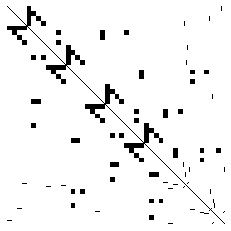

In [3]:
plt.axis('off')
plt.spy(np.abs(h.h_matrix))

## Band structure computation

In [4]:
num_points = 20
kk = np.linspace(0, 3.14 / a_si, num_points, endpoint=True)
band_sructure = []

for jj in range(num_points):
    vals, _ = h.diagonalize_periodic_bc([0.0, 0.0, kk[jj]])
    band_sructure.append(vals)

band_sructure = np.array(band_sructure)


## Visualization

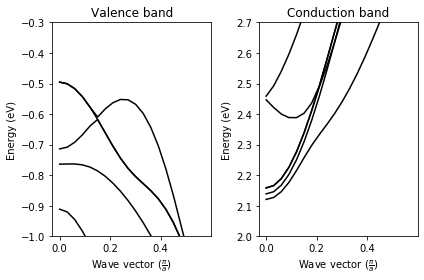

In [5]:
split = 100
fig, ax = plt.subplots(1, 2)
ax[0].set_ylim(-1.0, -0.3)
ax[0].plot(kk, np.sort(np.real(band_sructure))[:, :split], 'k')
ax[0].set_xlabel(r'Wave vector ($\frac{\pi}{a}$)')
ax[0].set_ylabel(r'Energy (eV)')
ax[0].set_title('Valence band')

ax[1].set_ylim(2.0, 2.7)
ax[1].plot(kk, np.sort(np.real(band_sructure))[:, split:], 'k')
ax[1].set_xlabel(r'Wave vector ($\frac{\pi}{a}$)')
ax[1].set_ylabel(r'Energy (eV)')
ax[1].set_title('Conduction band')
fig.tight_layout()
plt.savefig('nanowire_bs.pdf')
plt.show()